In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import datasets
from math import sqrt

import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.optimize as opt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style("ticks")
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

## Data Split

In [3]:
anemia_df = pd.read_csv('../data/clean/anemia_bootstraped.csv', index_col=False)
x_values = anemia_df.drop(columns=["ANEMIA"])
x_values = anemia_df[['INTP', 'SEXO', 'EST_URB', 'EST_MARG', 'HB']]
y_values = anemia_df["ANEMIA"]
print(anemia_df.shape)

(200, 16)


In [4]:
# Data Split
from sklearn.model_selection import train_test_split
seed = 1234
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, random_state=seed)

## Metrics Used

In [5]:
def print_metrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred=y_pred)
    sns.heatmap(cm, annot=True)
    target_names = ['0', '1']
    print(classification_report(y_test, y_pred, target_names=target_names))
    print('Accuracy: {0}'.format(accuracy_score(y_test, y_pred)))
    
def plot_roc(y_test, y_pred, model):
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.plot(fpr, tpr, marker='.', label = 'AUC: %0.2f' % auc, color= 'green')
    plt.title('{0} (ROC + AUC)'.format(model))
    plt.xlabel('False Positive Rate (x)')
    plt.ylabel('True Positive Rate (y)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

## Random Forest (No Normalized)

              precision    recall  f1-score   support

           0       0.96      0.82      0.88        28
           1       0.86      0.97      0.91        32

   micro avg       0.90      0.90      0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60

Accuracy: 0.9


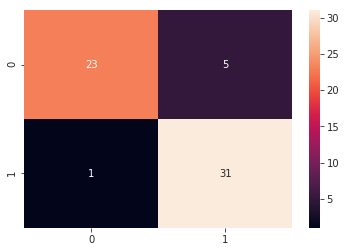

In [6]:
lr_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print_metrics(y_test, y_pred)

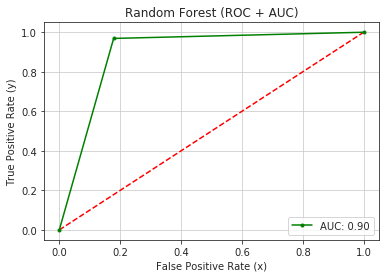

In [7]:
plot_roc(y_test, y_pred, 'Random Forest')

## Random Forest (Normalized Z-Score)

In [8]:
from sklearn import preprocessing
from scipy.stats import zscore
anemia_ndf = anemia_df.drop(columns=["ANEMIA"]).apply(zscore)
anemia_ndf['ANEMIA'] = anemia_df['ANEMIA']
anemia_ndf.head()

,INTP,ENTIDAD,MUNICI,LOCALI,ALTITUD,SEXO,EDADDIAS,EST_URB,EST_MARG,PONDEF,AREA,REGION,INDICEF,AFILIACI,HB,ANEMIA
0,-0.505004,1.523400,-0.257791,-0.200305,1.053404,-0.990050,-1.332723,-1.170328,1.105542,-0.419917,1.304877,1.217192,0.177599,-1.062059,0.144413,0.0
1,-0.972600,0.102428,-0.577631,-0.261356,-0.254913,-0.990050,0.146256,-0.022948,1.105542,-0.656073,-0.766356,-0.509321,-0.234795,0.848119,0.686810,0.0
2,2.768169,-1.081715,-0.257791,-0.072100,1.188631,-0.990050,1.155080,-1.170328,1.105542,-0.128654,1.304877,1.217192,0.133070,0.848119,1.093608,0.0
3,-0.505004,1.404986,-0.321759,0.019475,-0.929920,1.010051,0.793605,-1.170328,1.105542,-0.611524,1.304877,-1.372578,-1.235858,0.848119,0.144413,0.0
4,-0.505004,0.102428,-0.513663,-0.267461,0.276978,1.010051,1.703201,1.124433,-0.904534,0.215062,-0.766356,-0.509321,-0.189841,-1.444095,-0.262385,1.0


In [9]:
nx_values = anemia_ndf.drop(columns=['ANEMIA']) 
ny_values = anemia_ndf['ANEMIA']
nx_train, nx_test, ny_train, ny_test = train_test_split(nx_values, ny_values, test_size=0.3, random_state=seed)

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        28
           1       0.86      1.00      0.93        32

   micro avg       0.92      0.92      0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60

Accuracy: 0.9166666666666666


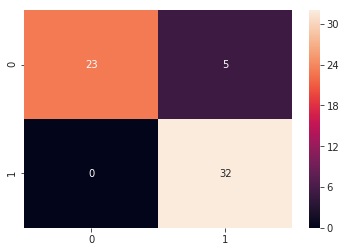

In [10]:
lr_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
lr_model.fit(nx_train, ny_train)
ny_pred = lr_model.predict(nx_test)
print_metrics(ny_test, ny_pred)

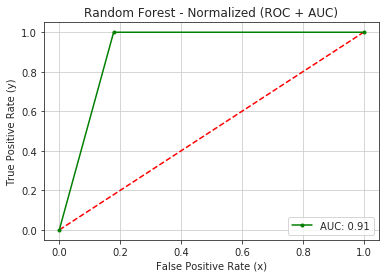

In [11]:
plot_roc(ny_test, ny_pred, 'Random Forest - Normalized')